In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.features.importances import FeatureImportances

In [2]:
iview = pd.read_csv('Interview.csv')
iview.head()

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,...,NaN,NaN,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 4,Male,Chennai,...,Yes,Yes,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 5,Male,Chennai,...,Yes,Yes,Uncertain,No,Married,NaN,NaN,NaN,NaN,NaN


In [3]:
iview.shape

(1234, 28)

In [4]:
iview.columns

Index(['Date of Interview', 'Client name', 'Industry', 'Location',
       'Position to be closed', 'Nature of Skillset', 'Interview Type',
       'Name(Cand ID)', 'Gender', 'Candidate Current Location',
       'Candidate Job Location', 'Interview Venue',
       'Candidate Native location',
       'Have you obtained the necessary permission to start at the required time',
       'Hope there will be no unscheduled meetings',
       'Can I Call you three hours before the interview and follow up on your attendance for the interview',
       'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much',
       'Have you taken a printout of your updated resume. Have you read the JD and understood the same',
       'Are you clear with the venue details and the landmark.',
       'Has the call letter been shared', 'Expected Attendance',
       'Observed Attendance', 'Marital Status', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unname

In [5]:
iview.isnull().sum()

Date of Interview                                                                                        1
Client name                                                                                              0
Industry                                                                                                 1
Location                                                                                                 1
Position to be closed                                                                                    1
Nature of Skillset                                                                                       1
Interview Type                                                                                           1
Name(Cand ID)                                                                                            1
Gender                                                                                                   1
Candidate Current Location           

In [6]:
iview = iview.drop(['Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'],axis = 1)

In [7]:
iview[iview['Date of Interview'].isna() == True]

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
1233,NaN,﻿﻿,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
iview = iview.drop(1233, axis = 0)

In [9]:
iview2 = iview[['Industry',
       'Position to be closed', 'Interview Type','Gender','Interview Venue',
       'Have you obtained the necessary permission to start at the required time',
       'Hope there will be no unscheduled meetings',
       'Can I Call you three hours before the interview and follow up on your attendance for the interview',
       'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much',
       'Have you taken a printout of your updated resume. Have you read the JD and understood the same',
       'Are you clear with the venue details and the landmark.',
       'Has the call letter been shared', 'Expected Attendance',
       'Observed Attendance', 'Marital Status']]

In [10]:
def func():
    
    for i in iview2.columns:
        print(np.unique(pd.DataFrame(iview2[i].value_counts()).reset_index()['index']).tolist())
        #print(uni)

In [11]:
func()

['BFSI', 'Electronics', 'IT', 'IT Products and Services', 'IT Services', 'Pharmaceuticals', 'Telecom']
['AML', 'Dot Net', 'Niche', 'Production- Sterile', 'Routine', 'Selenium testing', 'Trade Finance']
['Sceduled walkin', 'Scheduled ', 'Scheduled Walk In', 'Scheduled Walkin', 'Walkin', 'Walkin ']
['Female', 'Male']
['- Cochin- ', 'Bangalore', 'Chennai', 'Gurgaon', 'Hosur', 'Hyderabad', 'Noida']
['NO', 'Na', 'No', 'Not yet', 'Yes', 'Yet to confirm', 'yes']
['Na', 'No', 'Not Sure', 'Not sure', 'Yes', 'cant Say', 'yes']
['Na', 'No', 'No Dont', 'Yes', 'yes']
['Na', 'No', 'No I have only thi number', 'Yes', 'na', 'yes']
['Na', 'No', 'No- will take it soon', 'Not Yet', 'Not yet', 'Yes', 'na', 'yes']
['Na', 'No', 'No- I need to check', 'Yes', 'na', 'no', 'yes']
['Havent Checked', 'Na', 'Need To Check', 'No', 'Not Sure', 'Not sure', 'Not yet', 'Yes', 'Yet to Check', 'na', 'no', 'yes']
['10.30 Am', '11:00 AM', 'NO', 'No', 'Uncertain', 'Yes', 'yes']
['NO', 'No', 'No ', 'Yes', 'no', 'no ', 'yes',

In [12]:
iview2 = iview2.replace(['Sceduled walkin', 'Scheduled Walk In', 'Scheduled Walkin', 'Walkin', 'Walkin '], 'Walk-in')
iview2 = iview2.replace(['Scheduled '], 'Scheduled')
iview2 = iview2.replace(['Yes', 'yes', 'yes ', 'YES', ' yes', 'Y','10.30 Am', '11:00 AM'], 'y')
iview2 = iview2.replace(['No', 'no', 'no ', 'NO', ' no', 'N', 'Na','na','No I have only thi number',
                        'No- will take it soon', 'n','Havent Checked','No ','No Dont','Not Yet'], 'n')
iview2 = iview2.replace(['Havent Checked', 'Need To Check', 'Not Sure', 'Not sure', 'Not yet', 'Yet to Check', 
                         'Yet to confirm','cant Say','No- I need to check'], 'Uncertain')
iview2 = iview2.replace(['IT Products and Services', 'IT Services'], 'IT')

In [13]:
def func():
    
    for i in iview2.columns:
        print(np.unique(pd.DataFrame(iview2[i].value_counts()).reset_index()['index']).tolist())
        #print(uni)

In [14]:
func()

['BFSI', 'Electronics', 'IT', 'Pharmaceuticals', 'Telecom']
['AML', 'Dot Net', 'Niche', 'Production- Sterile', 'Routine', 'Selenium testing', 'Trade Finance']
['Scheduled', 'Walk-in']
['Female', 'Male']
['- Cochin- ', 'Bangalore', 'Chennai', 'Gurgaon', 'Hosur', 'Hyderabad', 'Noida']
['Uncertain', 'n', 'y']
['Uncertain', 'n', 'y']
['n', 'y']
['n', 'y']
['Uncertain', 'n', 'y']
['Uncertain', 'n', 'y']
['Uncertain', 'n', 'y']
['Uncertain', 'n', 'y']
['n', 'y']
['Married', 'Single']


In [16]:
iview2.columns

Index(['Industry', 'Position to be closed', 'Interview Type', 'Gender',
       'Interview Venue',
       'Have you obtained the necessary permission to start at the required time',
       'Hope there will be no unscheduled meetings',
       'Can I Call you three hours before the interview and follow up on your attendance for the interview',
       'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much',
       'Have you taken a printout of your updated resume. Have you read the JD and understood the same',
       'Are you clear with the venue details and the landmark.',
       'Has the call letter been shared', 'Expected Attendance',
       'Observed Attendance', 'Marital Status'],
      dtype='object')

In [17]:
iview2.isnull().sum()

Industry                                                                                                0
Position to be closed                                                                                   0
Interview Type                                                                                          0
Gender                                                                                                  0
Interview Venue                                                                                         0
Have you obtained the necessary permission to start at the required time                              204
Hope there will be no unscheduled meetings                                                            247
Can I Call you three hours before the interview and follow up on your attendance for the interview    247
Can I have an alternative number/ desk number. I assure you that I will not trouble you too much      247
Have you taken a printout of your updated resu

In [18]:
iview2 = iview2.fillna('n')

In [19]:
iview2.isnull().sum().sum()

0

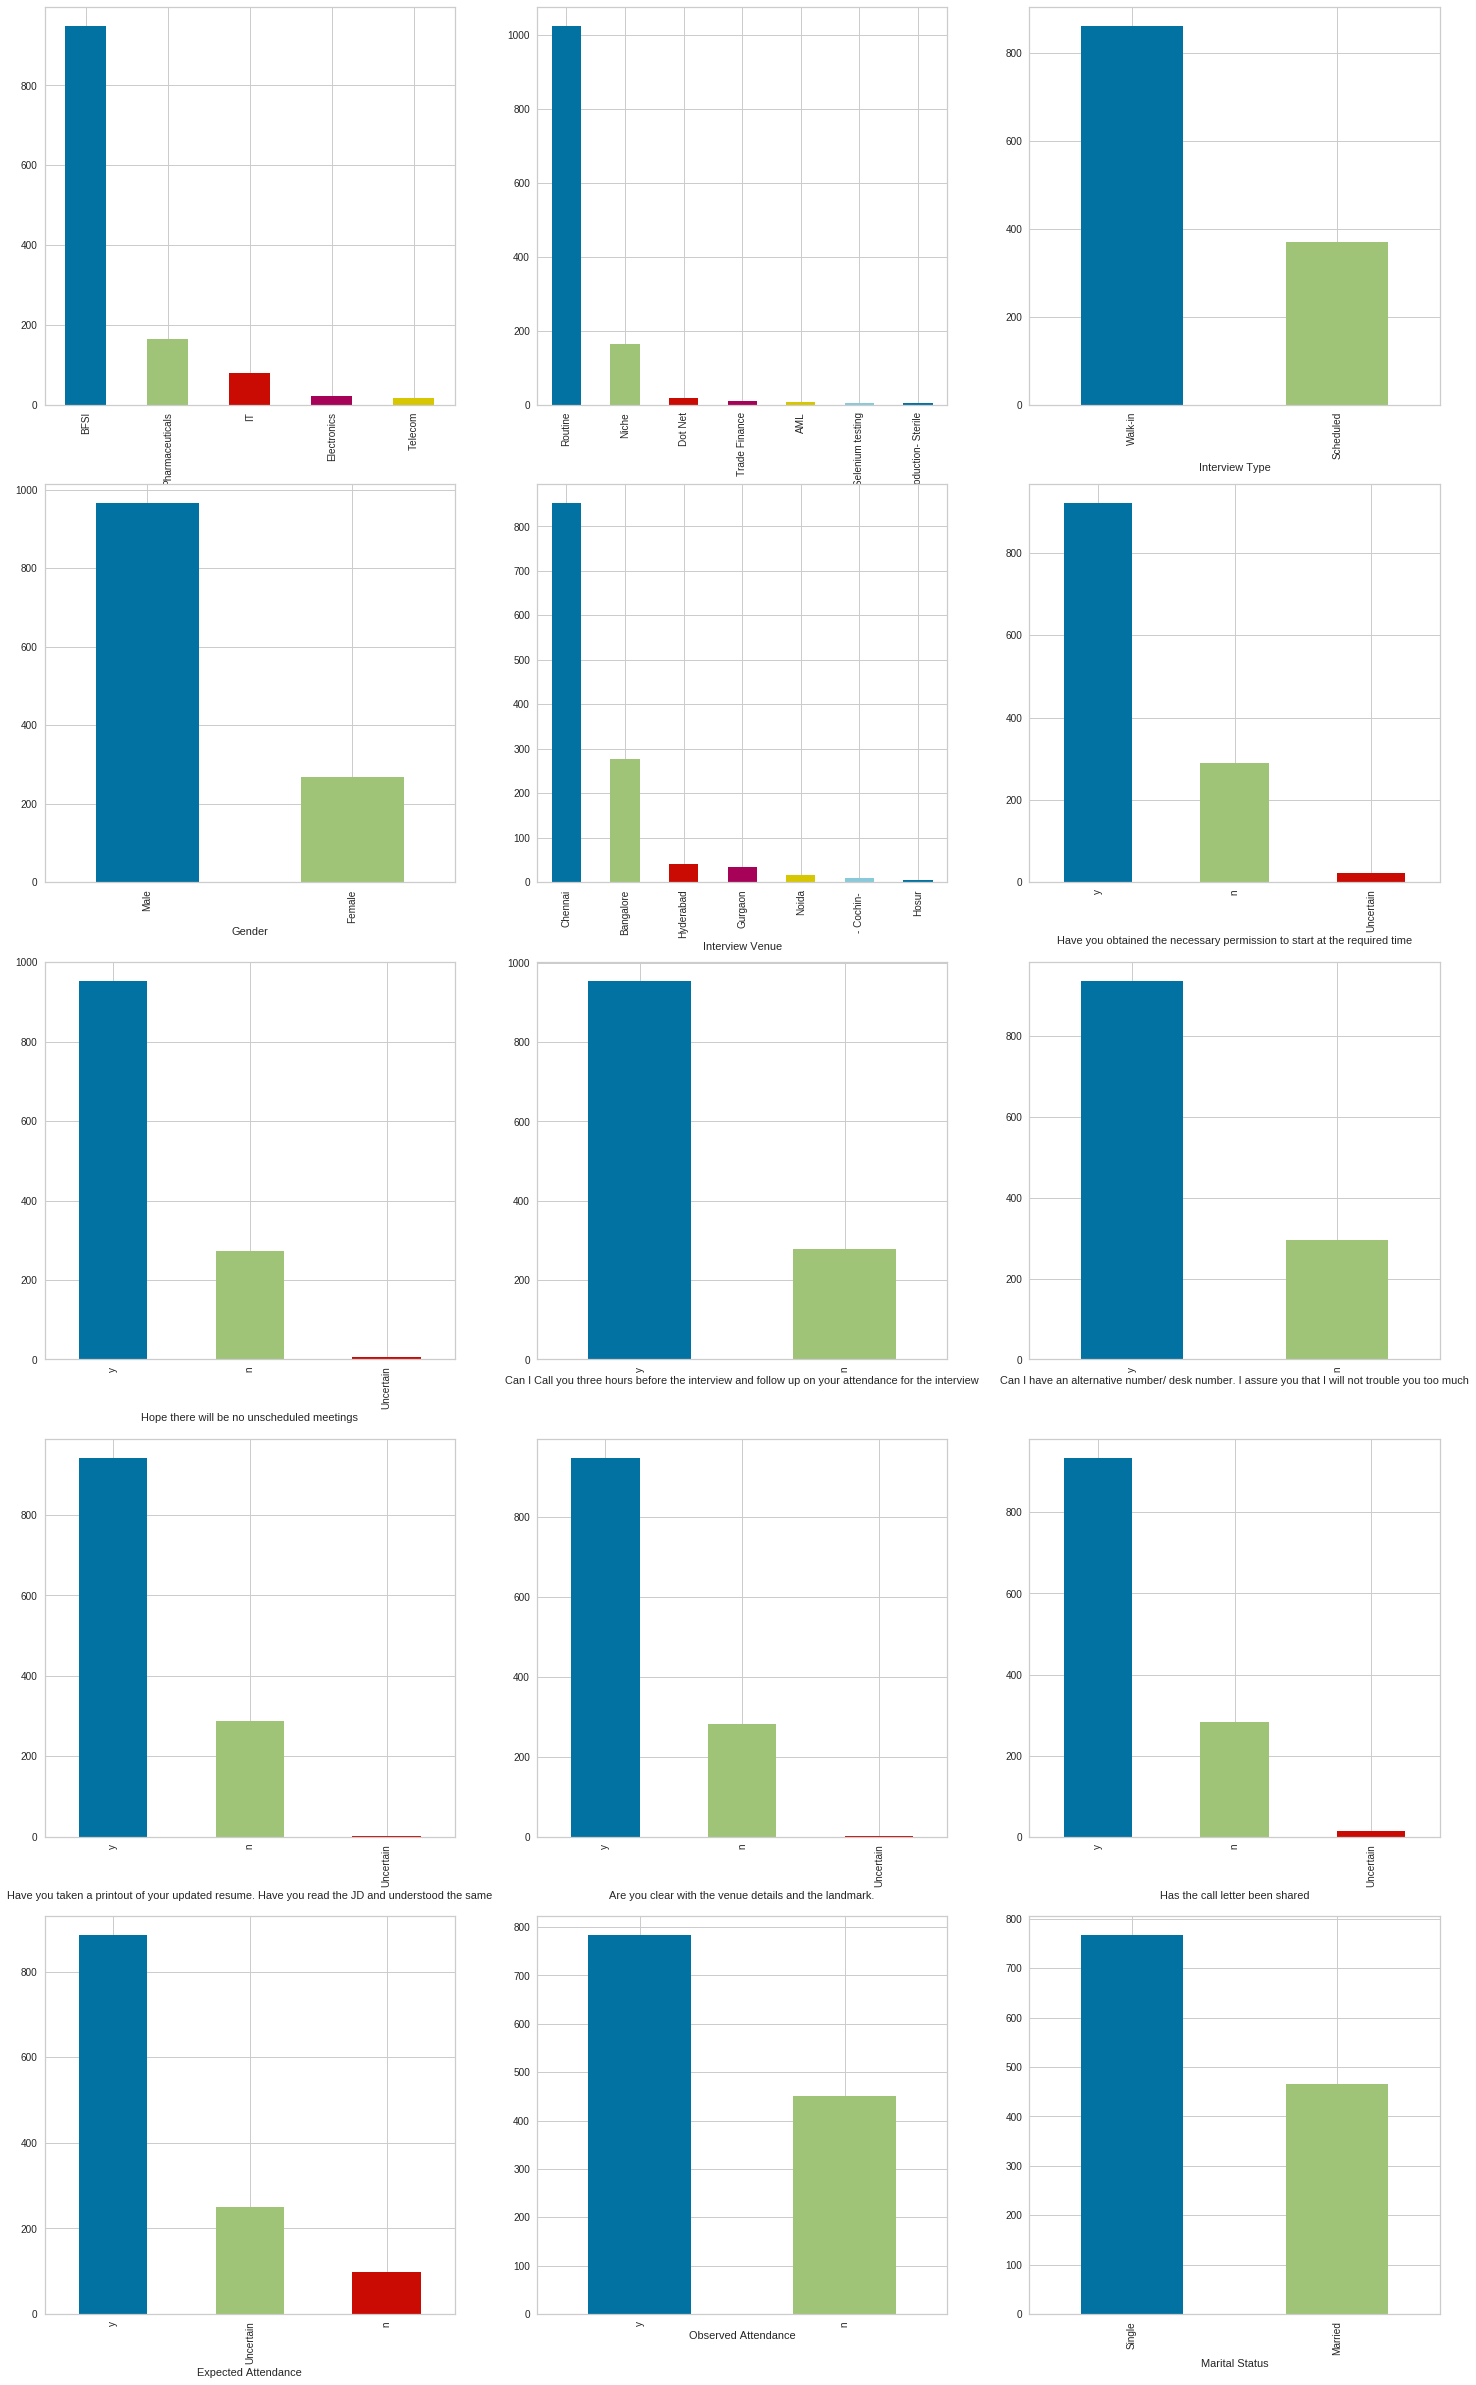

In [21]:
def cat_barplot():
    for n in range(0, (len(iview2.columns))):
        plt.subplot(7, 3, n+1)
        iview2.select_dtypes(include = ['object']).iloc[:,n].value_counts().plot(kind = 'bar')
        plt.xlabel(iview2.select_dtypes(include = ['object']).iloc[:,n].name)
plt.figure(figsize = (25, 60))
cat_barplot()
plt.show()
# Showing the classes in the features (categorical features)

In [46]:
y = pd.DataFrame(iview2.groupby(by = ['Marital Status', 'Observed Attendance'])['Expected Attendance'].count()).reset_index()

In [47]:
y

,Marital Status,Observed Attendance,Expected Attendance
0,Married,n,176
1,Married,y,290
2,Single,n,274
3,Single,y,493


In [67]:
def func1():
    for i in iview2.columns[1:-3]:
        y = pd.DataFrame(iview2.groupby(by = [i, 'Observed Attendance'])['Expected Attendance'].count()).reset_index()
        
        sns.barplot(x = i, y = 'Expected Attendance', hue = 'Observed Attendance', data = y)
        plt.show()

In [66]:
iview2.columns[1:-3]

Index(['Position to be closed', 'Interview Type', 'Gender', 'Interview Venue',
       'Have you obtained the necessary permission to start at the required time',
       'Hope there will be no unscheduled meetings',
       'Can I Call you three hours before the interview and follow up on your attendance for the interview',
       'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much',
       'Have you taken a printout of your updated resume. Have you read the JD and understood the same',
       'Are you clear with the venue details and the landmark.',
       'Has the call letter been shared'],
      dtype='object')

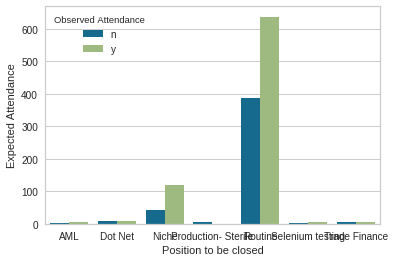

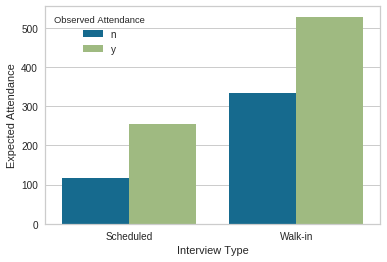

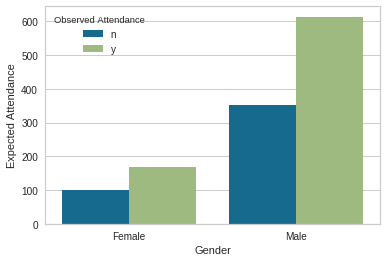

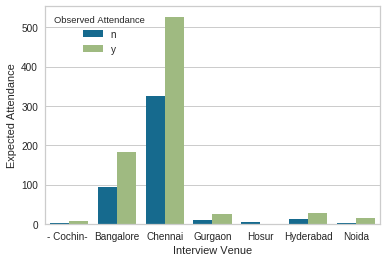

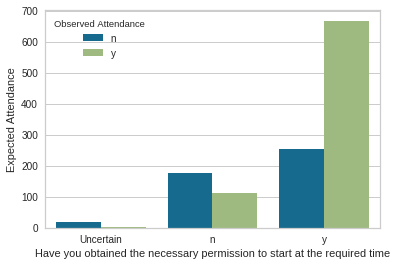

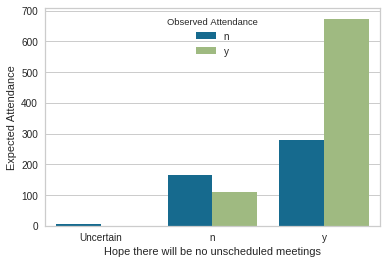

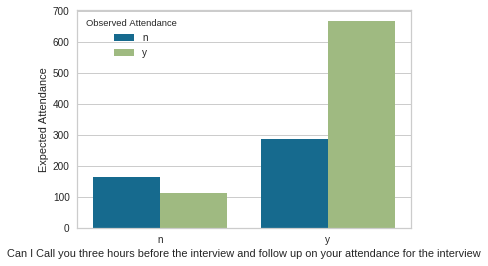

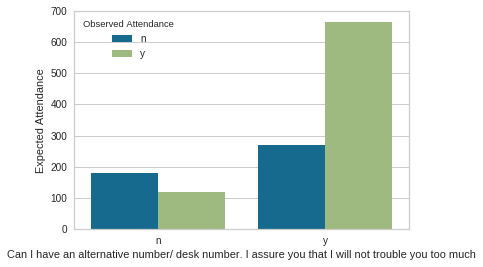

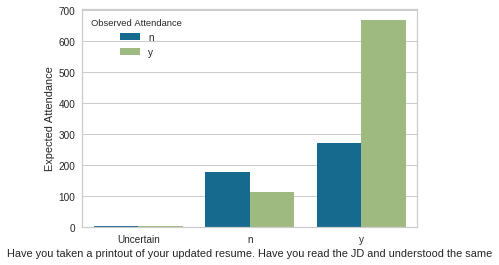

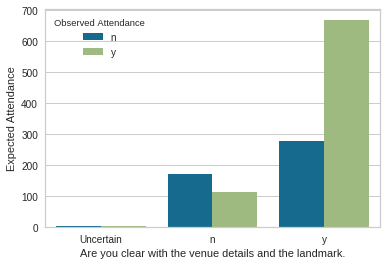

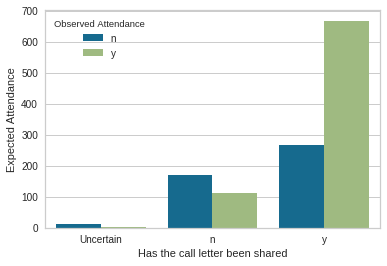

In [68]:
func1()

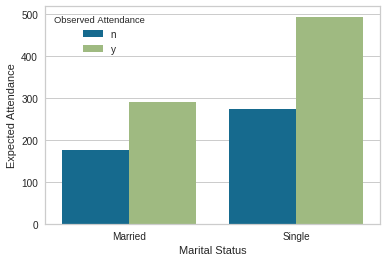

In [48]:
sns.barplot(x = 'Marital Status', y = 'Expected Attendance', hue = 'Observed Attendance', data = y)
plt.show()

In [20]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
iview3 = iview2.apply(le.fit_transform)

,Industry,Position to be closed,Interview Type,Gender,Interview Venue,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
0,3,3,1,1,4,2,2,1,1,2,2,2,2,0,1
1,3,3,1,1,4,2,2,1,1,2,2,2,2,0,1
2,3,3,1,1,4,1,1,0,0,1,1,1,0,0,1
3,3,3,1,1,4,2,2,0,1,1,2,2,0,0,1
4,3,3,1,1,4,2,2,1,0,2,2,2,0,0,0
5,2,5,1,1,3,2,2,1,1,2,2,2,2,1,1
6,2,5,1,1,3,2,2,1,1,2,2,2,2,1,1
7,2,5,1,0,3,2,2,1,1,2,2,2,2,1,1
8,2,5,1,1,3,2,2,1,1,2,2,2,2,1,1
9,2,5,1,0,3,2,2,1,1,2,2,2,2,0,1
